In [33]:
import datetime

def create_assist_date(datestart = None,dateend = None):
# 创建日期辅助表
    if datestart is None:
        datestart = '1978-12-01'
    if dateend is None:
        dateend = datetime.datetime.now().strftime('%Y-%m-%d')

    # 转为日期格式
    datestart=datetime.datetime.strptime(datestart,'%Y-%m-%d')
    dateend=datetime.datetime.strptime(dateend,'%Y-%m-%d')
    date_list = []
    date_list.append(datestart.strftime('%Y-%m-%d'))
    while datestart<dateend:
    # 日期叠加一天
        datestart+=datetime.timedelta(days=+1)
    # 日期转字符串存入列表
        date_list.append(datestart.strftime('%Y-%m-%d'))
    return date_list


if __name__ == '__main__':
    date = create_assist_date("1979-01-01","1990-12-31")

In [34]:
len(date)

4383

In [28]:
937/12
1080/12

90.0

In [47]:
import matplotlib
import re
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [6]:
data = np.loadtxt("log") 
data.shape

(4380, 8)

In [91]:
months = data[:,0]
days = data[:,1]
SST = data[:,4]
temp = data[:,5]

In [93]:
temp.shape

(4380,)

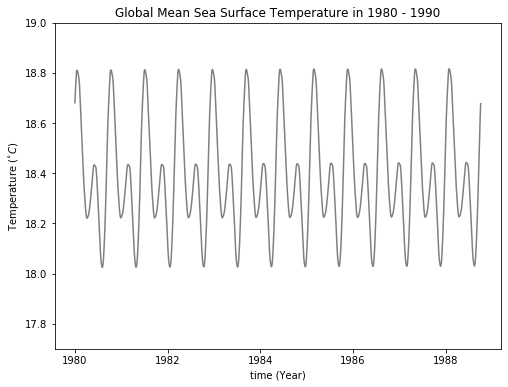

In [101]:
plt.figure(figsize=(8,6))
ax = plt.subplot()
ax.plot(SST,color='gray')
#as.set_xtick()
ax.set(xlabel='time (Year)', ylabel='Temperature ($^{\circ}C$)',
        title='Global Mean Sea Surface Temperature in 1980 - 1990')
tick = [0,1980,1982,1984,1986,1988]
ax.set_xticklabels(tick)
ax.set_ylim(17.7,19)
plt.savefig('GloSST78-90.png')
plt.show()


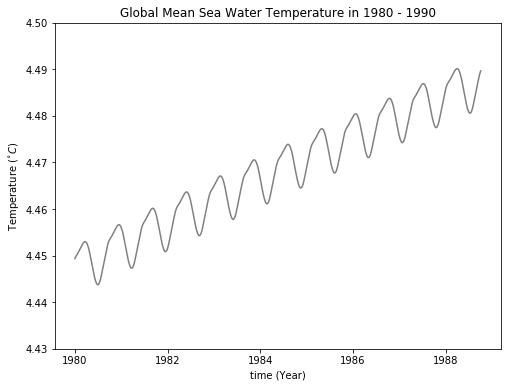

In [102]:
plt.figure(figsize=(8,6))
ax = plt.subplot()
ax.plot(temp,color='gray')
#as.set_xtick()
ax.set(xlabel='time (Year)', ylabel='Temperature ($^{\circ}C$)',
        title='Global Mean Sea Water Temperature in 1980 - 1990')
tick = [0,1980,1982,1984,1986,1988]
ax.set_xticklabels(tick)
ax.set_ylim(4.43,4.5)
plt.savefig('GloWater80-90.png')
plt.show()


# 手动计算时间序列 

In [1]:
import matplotlib
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from tqdm import tqdm

In [2]:
import os
rootdir = './compare1/'
list = os.listdir(rootdir) #列出文件夹下所有的目录与文件

In [3]:
ds = xr.open_dataset(rootdir+list[1],decode_times=False)
ts  = ds['ts'][0,0]
lon = ts.coords['lon'].values
lat = ts.coords['lat'].values
a = 6.371e6
list.sort()

In [4]:
lat = abs(lat - 90)
lon[-1] = lon[0]
lon

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120., 122., 124., 126., 128., 130.,
       132., 134., 136., 138., 140., 142., 144., 146., 148., 150., 152.,
       154., 156., 158., 160., 162., 164., 166., 168., 170., 172., 174.,
       176., 178., 180., 182., 184., 186., 188., 190., 192., 194., 196.,
       198., 200., 202., 204., 206., 208., 210., 212., 214., 216., 218.,
       220., 222., 224., 226., 228., 230., 232., 234., 236., 238., 240.,
       242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284.,
       286., 288., 290., 292., 294., 296., 298., 30

In [5]:
lat

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  61.,  62.,
        63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,
        74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
        85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106.,
       107., 108., 109., 110., 111., 112., 113., 114., 115., 116., 117.,
       118., 119., 120., 122., 124., 126., 128., 130., 132., 134., 136.,
       138., 140., 142., 144., 146., 148., 150., 152., 154., 156., 158.,
       160., 162., 164., 166., 168.], dtype=float32)

In [61]:
SST_ori = []
for k in tqdm(range(10)):
    try: 
        ds = xr.open_dataset(rootdir+list[k],decode_times=False)
    except:
        continue
    ts  = ds['ts'][0,0]
    #print(ts)
    num = 0
    SST = 0.0
    for i in range(len(lat)):
        for j in range(2,len(lon)):
            if np.isnan(ts[i,j]):
                continue
            else:
                num = num + 1  
                SST = SST + ts[i,j].values
                #print(SST)
    SST_ori.append(SST/num)
    #print(SST_ori)

100%|██████████| 10/10 [04:05<00:00, 24.55s/it]


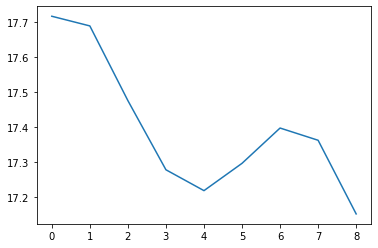

In [62]:
import matplotlib.pyplot as plt
plt.plot(SST_ori)

In [73]:
SST_ori

[17.716572009426372,
 17.68888122620538,
 17.4753423359834,
 17.277567547512,
 17.21789050125442,
 17.295967747210348,
 17.396905115323605,
 17.361909561460237,
 17.151323964396585]

In [7]:
%%time
# 表面积计算 # SST  
SST_series = []
for n in tqdm(range(2)):
    try: 
        ds = xr.open_dataset(rootdir+list[n],decode_times=False)
    except:
        continue
    ts  = ds['ts'][0,0]
    S = 0.0
    SST = 0.0
    def f(x,y):
        return abs(np.sin(np.pi*x/180)*a*a)
    for i in range(len(lat)):
        for j in range(1,len(lon)):
            if np.isnan(ts[i,j]):
                continue
            elif (59<lat[i]<121):
                area, err = integrate.dblquad(f, np.pi/180*(abs(lat[i]-0.5)), np.pi/180*(abs(lat[i]+0.5)), np.pi/180*(abs(lon[j]-0.5)),np.pi/180*(abs(lon[j]+0.5)))
                S = S + area
                SST = SST + area*ts[i,j].values
            else:
                area, err = integrate.dblquad(f, np.pi/180*(abs(lat[i]-1.0)), np.pi/180*(abs(lat[i]+1.0)), np.pi/180*(abs(lon[j]-1.0)),np.pi/180*(abs(lon[j]+1.0))) # lat:i,lon:j
                S = S + area
                SST = SST + area*ts[i,j].values
    SST_series.append(abs(SST/S))
    print('%e' % S)
#print('%e' % v)
#print('%e' % S)  #3.6e14 4.16e13
#print('%e' % S)

100%|██████████| 2/2 [00:50<00:00, 25.06s/it]

2.355248e+13
CPU times: user 49.2 s, sys: 6.45 ms, total: 49.2 s
Wall time: 50.1 s


In [23]:
aa = 361745300e6
print('%e' % aa)

3.617453e+14


In [89]:
sta_Sea_area = 4*np.pi*a*a*0.7
print('%e'%sta_Sea_area)

3.570451e+14


In [8]:
SST_series

[12.011730776508646]

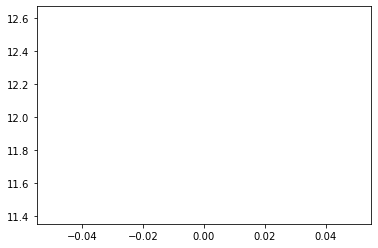

In [9]:
import matplotlib.pyplot as plt
plt.plot(SST_series)

In [ ]:
# TEST
def f(x,y):
    return abs(np.sin(np.pi*x/180))
v, err = integrate.dblquad(f, np.pi/180*(abs(lat[95])-1.0), np.pi/180*(abs(lat[95])+1.0), np.pi/180*(abs(lon[99])-1.0),np.pi/180*(abs(lon[99])+1.0)) # lat:i,lon:j
X = v*a*a
print('%e' % X)

In [1]:
a = 1

In [1]:
import matplotlib
import re
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [10]:
data = np.loadtxt("log00-06") 
data.shape

(1856, 8)

In [11]:
months = data[:,0]
days = data[:,1]
SST = data[:,4]
temp = data[:,5]

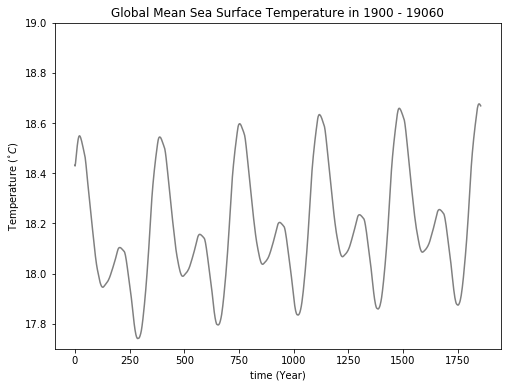

In [12]:
plt.figure(figsize=(8,6))
ax = plt.subplot()
ax.plot(SST,color='gray')
#as.set_xtick()
ax.set(xlabel='time (Year)', ylabel='Temperature ($^{\circ}C$)',
        title='Global Mean Sea Surface Temperature in 1900 - 19060')
#tick = [0,1980,1982,1984,1986,1988]
#ax.set_xticklabels(tick)
ax.set_ylim(17.7,19)
#plt.savefig('GloSST78-90.png')
plt.show()

In [14]:
130/15

8.666666666666666